### import libs and quick view

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("res/pima/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### EDA

In [4]:
#sns.pairplot(df)

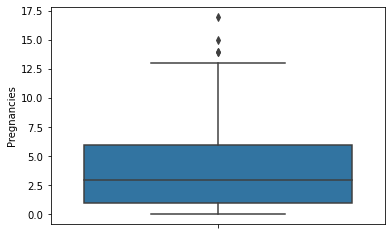

In [5]:
sns.boxplot(y="Pregnancies", data=df)

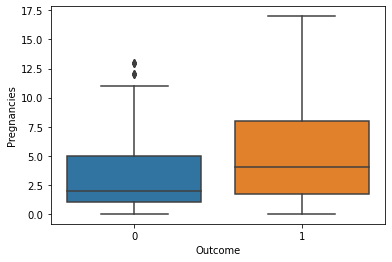

In [6]:
sns.boxplot(x="Outcome", y="Pregnancies", data=df)

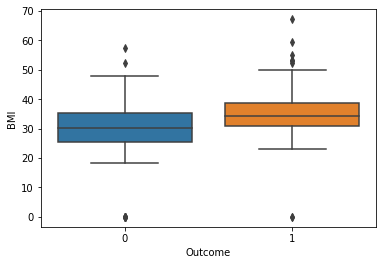

In [7]:
sns.boxplot(x="Outcome", y="BMI", data=df)

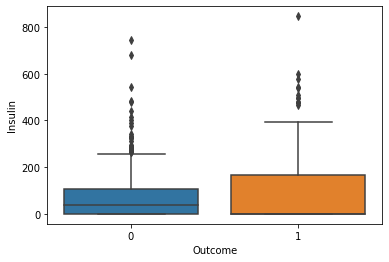

In [8]:
sns.boxplot(x="Outcome", y="Insulin", data=df)

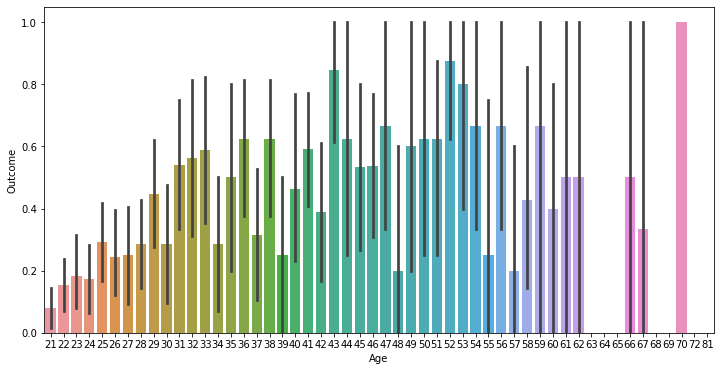

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x="Age", y="Outcome", data=df)

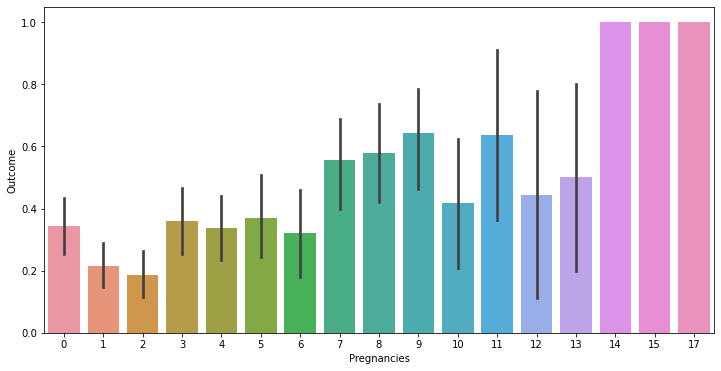

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x="Pregnancies", y="Outcome", data=df)

### Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
def show_upper_outlier(df, stdev=3, show_total=False):

    # lower bound outliers
    cols = df.columns
    print(df.shape)
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        threshold = mean + stdev * std
        n_outlier = np.sum(df[col] > threshold)
        print(col + ".  threshold "+str(round(threshold,2))+" num of outlier : "+str(n_outlier))
        if (show_total == True) & (n_outlier != 0):
            print(df.loc[(df[col] > threshold),col])

show_upper_outlier(df,stdev=3, show_total=True)

(768, 9)
Pregnancies.  threshold 13.95 num of outlier : 4
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
Glucose.  threshold 216.81 num of outlier : 0
BloodPressure.  threshold 127.17 num of outlier : 0
SkinThickness.  threshold 68.39 num of outlier : 1
579    99
Name: SkinThickness, dtype: int64
Insulin.  threshold 425.53 num of outlier : 18
8      543
13     846
111    495
153    485
186    495
220    478
228    744
247    680
286    545
370    465
409    579
415    474
486    480
584    600
645    440
655    540
695    480
753    510
Name: Insulin, dtype: int64
BMI.  threshold 55.65 num of outlier : 3
177    67.1
445    59.4
673    57.3
Name: BMI, dtype: float64
DiabetesPedigreeFunction.  threshold 1.47 num of outlier : 11
4      2.288
45     1.893
58     1.781
228    2.329
330    1.476
370    2.137
371    1.731
395    1.600
445    2.420
593    1.699
621    1.698
Name: DiabetesPedigreeFunction, dtype: float64
Age.  threshold 68.52 num of outlier : 5
123    6

In [14]:
def upper_outlier_transform(df, stdev=3):

    cols = df.columns
    print("before drop outlier : {}".format(df.shape))
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        threshold = mean + stdev * std
        n_outlier = np.sum(df[col] > threshold)
        #print(df[df[col] > threshold])
        df.drop(df[df[col] > threshold].index[:], inplace=True)

    df.dropna()
    print("after drop outlier : {}".format(df.shape))

### Scaling

In [15]:
def df_transform(df):
    X = df.loc[:, df.columns != "Outcome"]
    y = df.loc[:, df.columns == "Outcome"]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X, y, X_scaled

X, y, X_scaled = df_transform(df)
print(X_scaled[:,:6])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546]
 ...
 [ 0.3429808   0.00330087  0.14964075  0.15453319  0.27959377 -0.73518964]
 [-0.84488505  0.1597866  -0.47073225 -1.28821221 -0.69289057 -0.24020459]
 [-0.84488505 -0.8730192   0.04624525  0.65635768 -0.69289057 -0.20212881]]


### modeling process

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


def fit_clasifiers(gs_clfs, X, y):
    for clf in gs_clfs:
        print(X.shape)
        clf.fit(X, y)
    
def show_gridsearch_result(gs_clfs):
    estimators = []
    scores = []
    params = []
    for clf in gs_clfs:
        estimators.append(str(clf.estimator))
        scores.append(clf.best_score_)
        params.append(clf.best_params_)


    for i, val in enumerate(estimators):
        print(val)
        print(scores[i])
        print(params[i])

        
        
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

lr = LogisticRegression()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

param_lr = {"penalty":["l1", "l2", "elasticnet", "none"]}
param_svc = {"kernel":["linear", "poly", "rbf", "sigmoid"]}
param_tree = {
    "max_depth" : [3, 4, 5, 6],
    "min_samples_split" : [2, 3]
}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5, refit=True)
gs_svc = GridSearchCV(svc, param_grid=param_svc, cv=5, refit=True)
gs_dt = GridSearchCV(dt, param_grid=param_tree, cv=5, refit=True)
gs_rf = GridSearchCV(rf, param_grid=param_tree, cv=5, refit=True)

gs_clfs = [gs_lr, gs_svc, gs_dt, gs_rf]
fit_clasifiers(gs_clfs, X_train, y_train)
show_gridsearch_result(gs_clfs)




(614, 8)
(614, 8)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.p

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

(614, 8)
(614, 8)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

LogisticRegression()
0.7801412768226044
{'penalty': 'none'}
SVC(probability=True)
0.783433293349327
{'kernel': 'linear'}
DecisionTreeClassifier()
0.7264560842329735
{'max_depth': 3, 'min_samples_split': 2}
RandomForestClassifier()
0.7622550979608157
{'max_depth': 4, 'min_samples_split': 3}


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### metrics of best estimator(Logistic Regression)

[[75 16]
 [25 38]]
Acc : 0.7337662337662337
precision : 0.7037037037037037
recall : 0.6031746031746031
th val : [0.06921789 0.07065762 0.07080018 0.07094987]
precision val : [0.45323741 0.44927536 0.45255474 0.45588235]
recalls val : [1.         0.98412698 0.98412698 0.98412698]


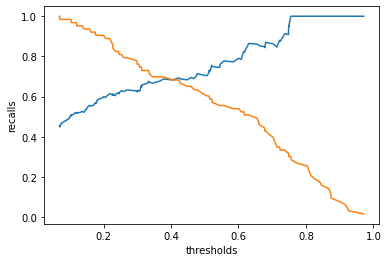

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score, precision_score,roc_curve
from sklearn.metrics import precision_recall_curve

def show_metrics(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion)
    print("Acc : {}".format(accuracy))
    print("precision : {}".format(precision))
    print("recall : {}".format(recall))

def show_precision_recall_curve(y_test,prob_positive_pred):
    precisions, recalls, thresholds = precision_recall_curve(y_test, prob_positive_pred)
    print("th val : {}".format(thresholds[:4]))
    print("precision val : {}".format(precisions[:4]))
    print("recalls val : {}".format(recalls[:4]))

    df = {
        "thresholds":thresholds, 
          "precisions":precisions[:-1], 
          "recalls":recalls[:-1]
    }
    df = pd.DataFrame.from_dict(df)

    sns.lineplot(x="thresholds", y="precisions", data=df)
    sns.lineplot(x="thresholds", y="recalls", data=df)

    


y_pred = gs_lr.predict(X_test)
pred_prob = gs_lr.predict_proba(X_test)
show_metrics(y_test, y_pred)
y_pred = np.concatenate([pred_prob, y_pred.reshape(-1, 1)], axis=1)
prob_positive_pred = y_pred[:, 1]

show_precision_recall_curve(y_test,prob_positive_pred)

fpr val : [0.         0.         0.         0.01098901]
tpr val : [0.         0.01587302 0.3015873  0.3015873 ]
thresholds val : [1.97155331 0.97155331 0.755357   0.74914391]
0.8337694051979766


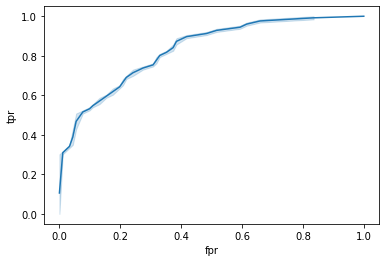

In [18]:
def show_roc_curve(y_test,prob_positive_pred):
    fpr, tpr, thresholds = roc_curve(y_test,prob_positive_pred)

    print("fpr val : {}".format(fpr[:4]))
    print("tpr val : {}".format(tpr[:4]))
    print("thresholds val : {}".format(thresholds[:4]))

    df = {"threshold":thresholds, "fpr":fpr, "tpr":tpr}
    df = pd.DataFrame.from_dict(df)
    sns.lineplot(x="fpr", y="tpr", data=df)

    roc_score = roc_auc_score(y_test, prob_positive_pred)
    print(roc_score)

show_roc_curve(y_test,prob_positive_pred)

### lower outlier processing

In [19]:
def show_lower_outlier(df, stdev=3, show_total=False):

    # lower bound outliers
    cols = df.columns
    print(df.shape)
    for col in cols:
        #std
        mean = df[col].mean()
        std = df[col].std()
        threshold = mean - stdev * std
        n_outlier = np.sum((df[col] < threshold) & (df[col] > 0))
        print(col + ". mean : "+str(round(mean,3))+", num of outlier : "+str(n_outlier))
        if (show_total == True) & (n_outlier != 0):
            print(df.loc[(df[col] < threshold) & (df[col] > 0),col][:5])
        
        print("   -> cnt of zero : " + str(np.sum(df[col] == 0))+"\n")

show_lower_outlier(df,show_total=True)

(768, 9)
Pregnancies. mean : 3.845, num of outlier : 0
   -> cnt of zero : 111

Glucose. mean : 120.895, num of outlier : 0
   -> cnt of zero : 5

BloodPressure. mean : 69.105, num of outlier : 0
   -> cnt of zero : 35

SkinThickness. mean : 20.536, num of outlier : 0
   -> cnt of zero : 227

Insulin. mean : 79.799, num of outlier : 0
   -> cnt of zero : 374

BMI. mean : 31.993, num of outlier : 0
   -> cnt of zero : 11

DiabetesPedigreeFunction. mean : 0.472, num of outlier : 0
   -> cnt of zero : 0

Age. mean : 33.241, num of outlier : 0
   -> cnt of zero : 0

Outcome. mean : 0.349, num of outlier : 0
   -> cnt of zero : 500



In [20]:
def lower_outlier_transform(df, stdev=3):
    cols = df.columns

    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        threshold = mean - stdev * std
        df.loc[(df[col] < threshold) & (df[col] > 0), col] = mean
    return df
    
df = lower_outlier_transform(df)

In [21]:
df.loc[ df.loc[:, "Insulin"] == 0 , "Insulin"] = df["Insulin"].mean()
df.loc[ df.loc[:, "SkinThickness"] == 0 , "SkinThickness"] = df["SkinThickness"].mean()
df.loc[ df.loc[:, "BloodPressure"] == 0 , "BloodPressure"] = df["BloodPressure"].mean()

show_lower_outlier(df,show_total=True)
df.isna().sum()

(768, 9)
Pregnancies. mean : 3.845, num of outlier : 0
   -> cnt of zero : 111

Glucose. mean : 120.895, num of outlier : 0
   -> cnt of zero : 5

BloodPressure. mean : 72.255, num of outlier : 3
18     30.0
125    30.0
597    24.0
Name: BloodPressure, dtype: float64
   -> cnt of zero : 0

SkinThickness. mean : 26.606, num of outlier : 0
   -> cnt of zero : 0

Insulin. mean : 118.66, num of outlier : 0
   -> cnt of zero : 0

BMI. mean : 31.993, num of outlier : 0
   -> cnt of zero : 11

DiabetesPedigreeFunction. mean : 0.472, num of outlier : 0
   -> cnt of zero : 0

Age. mean : 33.241, num of outlier : 0
   -> cnt of zero : 0

Outcome. mean : 0.349, num of outlier : 0
   -> cnt of zero : 500



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
print("before drop: "+ str(df.shape))

dfi = df.loc[:, (df.columns != "Outcome") & (df.columns != "Pregnancies")]
dfi[dfi[:] == 0] = np.NaN
df.iloc[:,1:-1] = dfi
df = df.dropna()

show_lower_outlier(df,show_total=True)

before drop: (768, 9)
(752, 9)
Pregnancies. mean : 3.851, num of outlier : 0
   -> cnt of zero : 108

Glucose. mean : 121.941, num of outlier : 0
   -> cnt of zero : 0

BloodPressure. mean : 72.278, num of outlier : 3
18     30.0
125    30.0
597    24.0
Name: BloodPressure, dtype: float64
   -> cnt of zero : 0

SkinThickness. mean : 26.669, num of outlier : 0
   -> cnt of zero : 0

Insulin. mean : 119.55, num of outlier : 0
   -> cnt of zero : 0

BMI. mean : 32.455, num of outlier : 0
   -> cnt of zero : 0

DiabetesPedigreeFunction. mean : 0.473, num of outlier : 0
   -> cnt of zero : 0

Age. mean : 33.312, num of outlier : 0
   -> cnt of zero : 0

Outcome. mean : 0.351, num of outlier : 0
   -> cnt of zero : 488



<ipython-input-22-026df600378e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi[dfi[:] == 0] = np.NaN
C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


[[80 11]
 [26 34]]
Acc : 0.7549668874172185
precision : 0.7555555555555555
recall : 0.5666666666666667
th val : [0.09146326 0.09286755 0.0935997  0.09376494]
precision val : [0.48387097 0.4796748  0.48360656 0.48760331]
recalls val : [1.         0.98333333 0.98333333 0.98333333]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


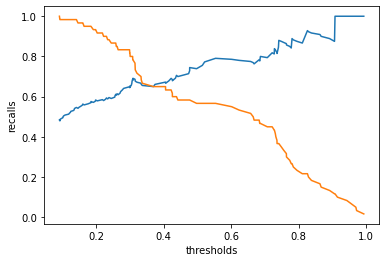

In [23]:
X, y, X_scaled = df_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pred_prob = lr.predict_proba(X_test)
show_metrics(y_test, y_pred)


y_pred = np.concatenate([pred_prob, y_pred.reshape(-1, 1)], axis=1)
prob_positive_pred = y_pred[:, 1]
show_precision_recall_curve(y_test,prob_positive_pred)

fpr val : [0.         0.         0.         0.01098901]
tpr val : [0.         0.01666667 0.11666667 0.11666667]
thresholds val : [1.9927823  0.9927823  0.90757854 0.90612896]
0.8432234432234432


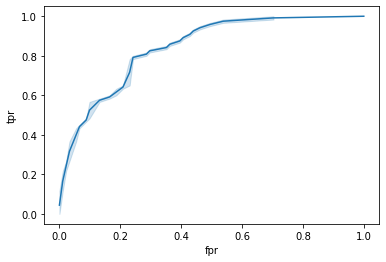

In [24]:
show_roc_curve(y_test,prob_positive_pred)

### find cross point of recall and precision

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_test, prob_positive_pred)

cp_idx = np.where(recalls == recalls[precisions==recalls])[0]
threshold = thresholds[cp_idx]
print("idx : "+str(cp_idx) +", threshold val : "+str(threshold))

idx : [64 65 66], threshold val : [0.36999791 0.37458178 0.40572082]


In [26]:
from sklearn.preprocessing import Binarizer

binarizier = Binarizer(threshold=0.37)
y_pred_bin = binarizier.fit_transform(pred_prob[:, 1].reshape(-1, 1))

y_pred_bin

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [27]:
y_pred = lr.predict(X_test)
pred_prob = lr.predict_proba(X_test)
pred_prob

array([[0.69177776, 0.30822224],
       [0.91366621, 0.08633379],
       [0.89799123, 0.10200877],
       [0.85359406, 0.14640594],
       [0.96812799, 0.03187201],
       [0.62541822, 0.37458178],
       [0.6941125 , 0.3058875 ],
       [0.80230946, 0.19769054],
       [0.70024803, 0.29975197],
       [0.96246251, 0.03753749],
       [0.27847618, 0.72152382],
       [0.84521127, 0.15478873],
       [0.96331853, 0.03668147],
       [0.88094212, 0.11905788],
       [0.85819049, 0.14180951],
       [0.85041132, 0.14958868],
       [0.13347346, 0.86652654],
       [0.94330629, 0.05669371],
       [0.71836667, 0.28163333],
       [0.59409113, 0.40590887],
       [0.74007902, 0.25992098],
       [0.69551254, 0.30448746],
       [0.86615074, 0.13384926],
       [0.66616151, 0.33383849],
       [0.78126514, 0.21873486],
       [0.90216301, 0.09783699],
       [0.66694953, 0.33305047],
       [0.93839368, 0.06160632],
       [0.70081701, 0.29918299],
       [0.79665349, 0.20334651],
       [0.

In [28]:
show_metrics(y_test, y_pred)

show_metrics(y_test, y_pred_bin)

[[80 11]
 [26 34]]
Acc : 0.7549668874172185
precision : 0.7555555555555555
recall : 0.5666666666666667
[[71 20]
 [21 39]]
Acc : 0.7284768211920529
precision : 0.6610169491525424
recall : 0.65
